<a href="https://colab.research.google.com/github/Felipe-Cancio/Dinamic-Draft-Reading/blob/master/Notebooks/leitura_calado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
# Importando as bibliotecas necessárias
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
# from ipywidgets import interact, interactive, interact_manual

In [ ]:
# VISUALIZAR IMAGEM
def displayImg(img, title):
  plt.figure(figsize=(32,32))
  plt.subplot(122),plt.imshow(img)
  plt.title(title), plt.xticks([]), plt.yticks([])
  plt.show()

# VISUALIZAR A COMPARAÇÃO DE DUAS IMAGENS
def compareImgs(image1, image2):
  plt.figure(figsize=(22,22))
  plt.subplot(121),plt.imshow(image1)
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.figure(figsize=(22,22))
  plt.subplot(122),plt.imshow(image2)
  plt.title('Corner Image'), plt.xticks([]), plt.yticks([])
  plt.show()

# IMG ORIGINAL VS DETECÇÃO DE CANTOS INTERATIVA
def compareCorner(originalImage, cornerImage):
  plt.figure(figsize=(22,22))
  plt.subplot(121),plt.imshow(originalImage)
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.figure(figsize=(22,22))
  plt.subplot(122),plt.imshow(cornerImage)
  plt.title('Corner Image'), plt.xticks([]), plt.yticks([])
  plt.show()

# # ORIGINAL VS DETECÇÃO DE BORDAS INTERATIVA (JUPYTER NOTEBOOKS)
# def compareEdges(minTreshould, maxTreshould):
#     global gray
#     # Canny Edge Detection
#     edges = cv.Canny(gray,minTreshould, maxTreshould)

#     plt.figure(figsize=(22,22))
#     plt.subplot(211),plt.imshow(gray, cmap='gray')
#     plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#     plt.figure(figsize=(22,22))
#     plt.subplot(212),plt.imshow(edges, cmap='gray')
#     plt.title('Edges Image'), plt.xticks([]), plt.yticks([])
#     plt.show()

In [ ]:
# Montando o Drive
from google.colab import drive
drive.mount('/content/drive/MyDrive/IFMA/II Hackaton Softex IFMA DCOMP 2023/Programação/Imagens')

In [ ]:
# Caminho da imagem de teste no drive
path = '1.jpg'

# # Caminho da imagem de teste no pc (Jupyter)
# path = '../imagens/11.jpg'
# image = cv.imread(path)                    # Lendo a imagem usando opencv
image = plt.imread(path)                    # Lendo a imagem usando matplotlib
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY) # Transformando a imagem p/ escala de cinza
grayf32 = np.float32(gray)                     # Convertendo o ndarray p/ float32 (necessário p/ o Harris Algorithm)
dst = cv.cornerHarris(grayf32,4,3,0.001)       # Detectando os cantos

#resultado é dilatado para marcar os cantos (não importante)
dst = cv.dilate(dst,None)
cornerImg = image.copy()          # Cópia do ndarray p/ poder fzr alterações
trshd = dst>0.01*dst.max()        # Definindo threshold
cornerImg[trshd]=[255,0,0]        # Aplicando threshold visualização dos cantos (> 1% do maior valor)

In [ ]:
# Achando as coordenadas do maior e menor canto (que esta mais acima e mais abaixo)
y,x = np.where(trshd == True)     # Achando as coordenadas de todos os cantos
print(f'Coordenada maior canto (h,l): ({y[0]},{x[0]})')
print(f'Coordenada menor canto (h,l): ({y[-1]},{x[-1]})')

# Desenhar retas para baixo a partir de ponto
# for i in range(y[-1],1080):
#   im[i,x[-1]] = [0,0,255]

Coordenada maior canto (h,l): (0,971)
Coordenada menor canto (h,l): (659,971)


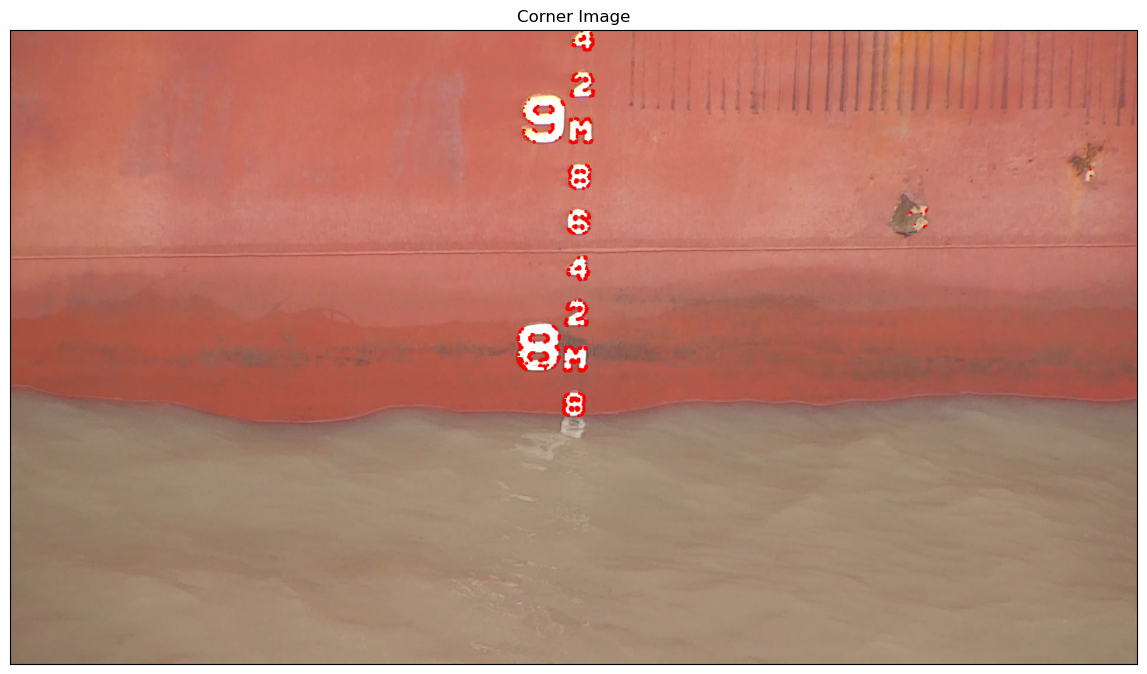

In [ ]:
# compareImg(image, cornerImg)    # Comparando as imagens antes e depois da detecção dos cantos
displayImg(cornerImg, 'Corner Image')             # Mostrar a marcação dos cantos

In [ ]:
# # Canny Edge Detection (JUPYTER NOTEBOOKS)
# interactive(compareEdges, minTreshould=(10,300,10), maxTreshould=(20,400,10)) # 250,350 - 50,100

# Canny Edge Detection (GOOGLE COLAB)
edges = cv.Canny(gray,50,100)
compareImgs(gray, edges)

interactive(children=(IntSlider(value=150, description='minTreshould', max=300, min=10, step=10), IntSlider(va…

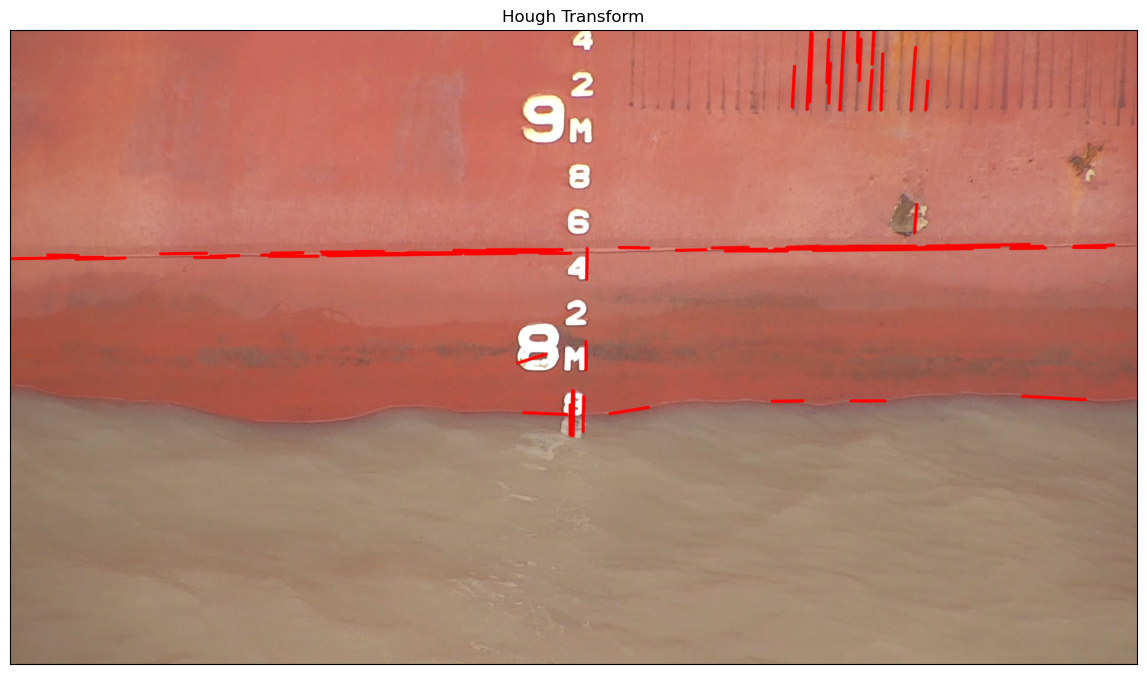

In [ ]:
# Hough Line Trasnform
copy = image.copy()   # Fazendo uma cópia da imagem original para desenhar as retas

# # CLÁSSICA
# lines = cv.HoughLines(edges, 1, np.pi/180, 150, None, 0, 0)
# if lines is not None:
#   for i in range(0, len(lines)):
#     rho = lines[i][0][0]
#     theta = lines[i][0][1]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a * rho
#     y0 = b * rho
#     pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
#     pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
#     cv.line(copy, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

# PROBABILÍSTICA
linesP = cv.HoughLinesP(edges, 1, np.pi/180, 50, None, 50, 10)

if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv.line(copy, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv.LINE_AA)

displayImg(copy, 'Hough Transform')